# Calculating Linear Regression using ordanary least sqare method 

our aim is to plot a progress line for given data points that alowes us to predict next outcome

In [2]:

#pyplot lib provides method to plot
from matplotlib import pyplot as plt
#numpy provides method to read data from csv
from numpy import *
#sklearn.linear_model provides pre built library for ols method
from sklearn.linear_model import LinearRegression

In [3]:
fig = plt.figure()
#step 1 geting data
points = genfromtxt("data.csv", delimiter=",")
x_points = []
y_points = []
for i in range(len(points)):
    x_points.append(points[i, 0])
    y_points.append(points[i, 1])


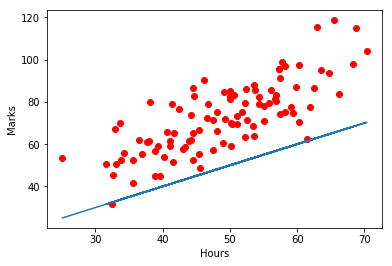

In [4]:
#previewing data 
def plot(x_points,y_points,gradient_points):

    #plot takes 3 parameters first as array of x points second as array of y points third optional that says either to represent line or point
    plt.plot(x_points,
             y_points,"ro")
    plt.plot(x_points,
             gradient_points)
    #labels of x and y
    plt.ylabel('Marks')
    plt.xlabel('Hours')
    
plot(x_points,y_points,x_points)

we are going to calculate gradiant desent for above graph by ordanary least sqare method 
we will be calulateing formula
 $$y=mx+b$$


where 

$$m=\sum_{i=0}^n \frac{(x_i-\bar x)(y_i-\bar y)}{(x_i-\bar x)^2}$$

$$ \bar x = \sum_{i=0}^n  \frac {x_i}{n} $$
$$ \bar y = \sum_{i=0}^n  \frac {y_i}{n} $$

$$ b=\bar y-m\bar x $$

In [5]:
#step 2 writing program for formula (Magic happens here)
#sumation of x 
#initilizing with 0
xsum=0
#sumation of y
##initilizing with 0
ysum=0
#n value
n=len(x_points)
#adding all values
for x in range(0,n):
    xsum+=x_points[x]
    ysum+=y_points[x]
#x bar value
xmean=xsum/n
#y bar value
ymean=ysum/n
#calculating m valye
m=((xsum-xmean)*(ysum-ymean)/((xsum-xmean)**2))
#calculating b value
b=ymean-(m*xmean)
#Formual equals
print('Formula after substuting calculated values y =',m,'x +',b)


Formula after substuting calculated values y = 1.48565184976 x + 0.0


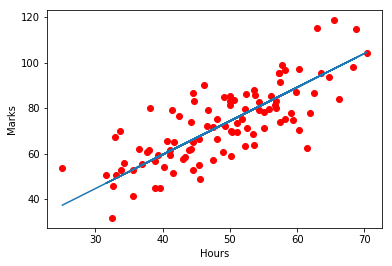

In [6]:
#step 3 using formula caluclating y points for ploting graph
#initial value
rate_gradent=[]
#calculating y point by substuing x value in formula m*x+b which gives y point
for x in range(0,n):
    rate_gradent.append((m*x_points[x])+b)
plot(x_points,y_points,rate_gradent)

# Calculating same values using machine  learning aproch
Linear Regression  Using Gradient Descent 

we are going to perform oprations for same formula y=mx+b but with diffrent formulas that gives us ML approach

In [39]:
#step 1 geting data this is already done 
#step 2 define Ml variables

#num_iterations tells the system to perform this many itration and learn from it by reducing error rate
num_iterations = 1000
#learning_rate this defines how fast system should learn 
learning_rate = 0.0001

#imitial vlaues of our variables that we are going to calculate
initial_b = 0 
initial_m = 0 

calculating gradient decent  using this formula with respective 
to m and b

$$\frac{\partial }{\partial m}=\frac{2}{N}\sum_{i=0}^n -x_i(y_i-(mx_i+b))$$
$$\frac{\partial }{\partial b}=\frac{2}{N}\sum_{i=0}^n -(y_i-(mx_i+b))$$

and caluclate error rate using this formula Error rate signifies how good the system is trained
$$ Error_(m,b)=\frac{1}{N}\sum_{i=0}^n (y_i-(mx_i+b))^2$$

In [77]:
#funtion for caluclating error
def error_rate(b,m,points):
    #value of n
    n=len(points)
    #initlizing error rate
    error=0
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        error += (y-((m*x)+b))**2
    return error/n;    
#function to calculate gradient decent
def gradient_decent(points,m,b,learning_rate,fig):
    #initilizing variable
    n=len(points)
    m_gradient=0
    b_gradient=0
    for i in range(n):
        x = points[i,0]
        y = points[i,1]
        b_gradient += - (2 / n) * (y - ((m * x) + b)) 
        m_gradient += - (2 / n) * x * (y -((m * x) + b))
    #Calculating new gradient decents by subtracting compund of learning rate and new desent values from old decent values
    new_m = m - (learning_rate * m_gradient)
    new_b = b - (learning_rate * b_gradient)
    
    rate_gradent=[]
    #calculating y point by substuing x value in formula m*x+b which gives y point
   
    for i in range(0,n):
        rate_gradent.append((new_m*x_points[i])+new_b)
    fig.plot(x_points,rate_gradent)
    return [new_m,new_b]
#function to call gradient decent function for specifed itration
def gradient_decent_call(points,m,b,learning_rate,ittration,fig):
    
    for i in range(ittration):
        m,b = gradient_decent(points,m,b,learning_rate,fig)
    return [m,b]



In [80]:
#step 3 claclulating m and b using formula defined
#initial error rate
error=error_rate(initial_b,initial_m,points)
print('error ',error)




error  5565.10783448


here we are ploting line and checking again for any improvment by calculating values learnig rate defines how much a plot line chan diverge from exsisting position ittrations specify how many times program has to retrain it self by doing that many itration and improving itself with factor of our learning rate defined 

Formula after substuting calculated values y = 1.47774408519 x + 0.0889365199374


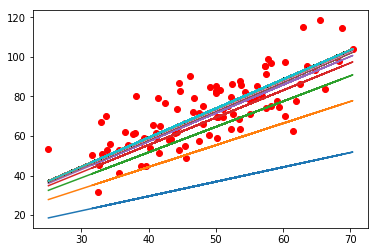

In [81]:
fig = plt
fig.plot(x_points,y_points,'ro')
m,b=gradient_decent_call(points,initial_m,initial_b,learning_rate,num_iterations,fig)
#Formual equals
print('Formula after substuting calculated values y =',m,'x +',b)

Graph above shows improvement in calcuation of gradient decent in per ittration

error  112.614810116


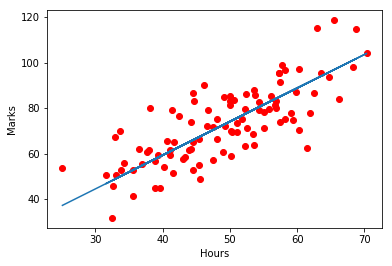

In [65]:
#step 4 visulalization
#susing formula caluclating y points for ploting graph
#initial value
rate_gradent=[]
#calculating y point by substuing x value in formula m*x+b which gives y point
for x in range(0,n):
    rate_gradent.append((m*x_points[x])+b)
plot(x_points,y_points,rate_gradent)
print('error ',error_rate(b,m,points));